In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
def progress(progress):
    '''
    Print the progress
    '''
    sys.stdout.write('\r%d%%'%progress)
        

In [3]:
def plot_result(observation,title,color):
    plt.plot(range(0,len(observation[0])),np.mean(observation,axis=0),color)
    plt.xlabel('Number of Plays')
    plt.ylabel('Average Reward')
    plt.title(title)
    plt.grid()
    plt.show()

# Epsilon Greedy
In this method an arm is chosen randomly with probability epsilon. i.e. While learning it will explore with a probability epsilon.

In [4]:
def epsilon_greedy(epsilon,arms,estimates):
    '''
    Returns the arm index by choosing the arm with max 
    estimate and randomly exploring with probability epsilon.
    '''
    arm_index=-1 #initialize
    if np.random.random_sample()<epsilon:
        arm_index=np.random.randint(0,arms)
    else:
        arm_index=np.argmax(estimates)
    return arm_index

# Softmax Probability
$P=\dfrac{e^{\dfrac{Q_t(a)}{\tau}}}{\sum\limits_{i=1}^n e^{\dfrac{Q_t(i)}{\tau}}}$<br/>
$\tau$ is the temperature term.<br/>
Higher temperature causes the choices to become equiprobable.

In [5]:
def softmax(temperature,arms,estimates):
    probab=[] #contains the (softmax)probability for each arm
    for arm in range(arms):
        num=np.exp(estimates[arm]/temperature)
        den=0.0
        for i in range(arms):
            if i!=arm:
                den+=np.exp(estimates[i]/temperature)
        probab.append(num/den)
        
    probab=np.array(probab)
    probab/=probab.sum()
    arm_index=np.random.choice(range(arms),p=probab)
    return arm_index

The estimate of action values:
$ Q_t(a) = \dfrac{R_1+R_2+...+R_{K_a}}{K_a} $<br/>
here $R_1,R_2,..R_{K_a}$ are the rewards recieved following all selections of action $a$ before play $t$.<br/>
This can also be written as:<br/>
$Q_{k+1}=\dfrac{1}{k}\sum\limits_{i=1}^k R_i$<br/>
$\hspace{1cm}=\dfrac{1}{k}\bigg(R_k+\sum\limits_{i=1}^{k-1} R_i\bigg)$<br/>
$\hspace{1cm}=Q_k+\dfrac{1}{k}\bigg(R_k-Q_k\bigg)$<br/>
$NewEstimate \longleftarrow OldEstimate+StepSize\bigg[Target-OldEstimate\bigg]$<br/>
$\big[Target-OldEstimate\big]$ is somewhat an error.

In [16]:
def learn(tasks_num,episodes,function,param,arms,arm_value_mean,arm_value_std_dev,reward_std_dev,step_size,init_estimate):
    results=[]
    for task in range(0,tasks_num):
        task_result=[]
        arm_mean_values=np.random.normal(arm_value_mean,arm_value_std_dev,arms) #contains the mean values of each arm
        estimates=[init_estimate]*arms #contains the estimates of each arm 
        tries=[0.0]*arms  #contains the number of times each arm has been played
        for episode in range(0,episodes):
            arm_index=function(param,arms,estimates)
            reward=np.random.normal(arm_mean_values[arm_index],arm_value_std_dev,arms)
            tries[arm_index]+=1 #update the arm 
            if step_size==0:
                step_size=1/float(tries[arm_index]) #basically the average
            estimates[arm_index]+=step_size*(arm_mean_values[arm_index]-estimates[arm_index]) #use the update formula
            #mentioned above
            task_result.append(reward)
        results.append(task_result)
        progress(float(task)/float(tasks_num-1)*100)
    return results
        

100%

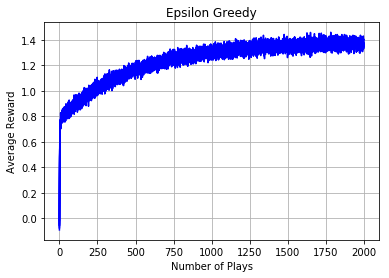

In [18]:
result1=learn(tasks_num=2000,episodes=2000,function=epsilon_greedy,param=0.1,arms=10,arm_value_mean=0,\
             arm_value_std_dev=1,reward_std_dev=1,step_size=0.1,init_estimate=0.0)
plot_result(result1,'Epsilon Greedy','b')

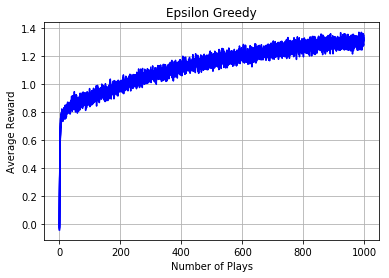

In [13]:
plot_result(result1,'Epsilon Greedy','b')

In [12]:
result2=learn(tasks_num=2000,episodes=1000,function=softmax,param=0.1,arms=10,arm_value_mean=0,\
             arm_value_std_dev=1,reward_std_dev=1,step_size=0.1,init_estimate=0.0)

100%

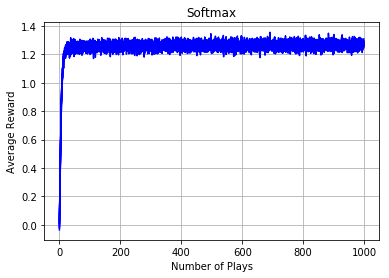

In [14]:
plot_result(result2,'Softmax','b')

# Choosing an optimistic initial value

100%

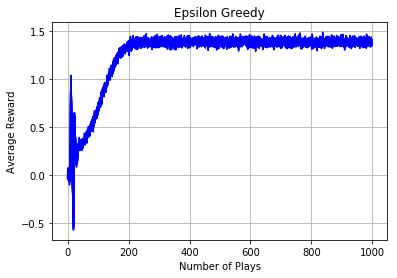

In [17]:
result=learn(tasks_num=2000,episodes=1000,function=epsilon_greedy,param=0.1,arms=10,arm_value_mean=0,\
             arm_value_std_dev=1,reward_std_dev=1,step_size=0.1,init_estimate=5.0)
plot_result(result,'Epsilon Greedy','b')

100%

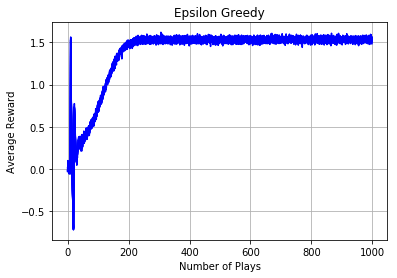

In [19]:
result=learn(tasks_num=2000,episodes=1000,function=epsilon_greedy,param=0,arms=10,arm_value_mean=0,\
             arm_value_std_dev=1,reward_std_dev=1,step_size=0.1,init_estimate=5.0)
plot_result(result,'Epsilon Greedy','b')